In [ ]:
#HW6 

#Do problems 15.4, 15.6, 15.15, 15.16

/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.32678e-17): result may not be accurate.
  overwrite_a=False)
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/joseph.ganser/anaconda3/lib/pyt

Best parameters:  Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001) 

MSE Mean squared error: 114959.90
r2 Coefficient of determination: 0.56


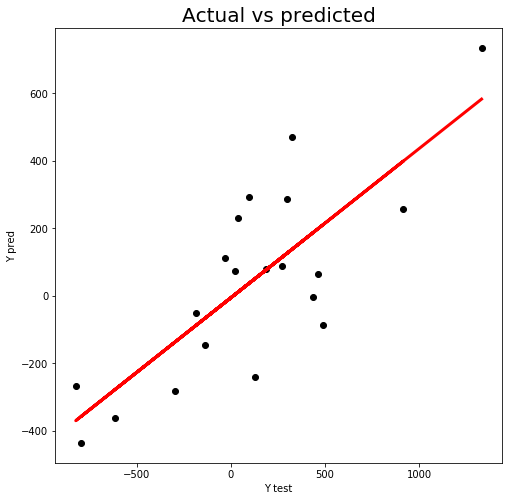

In [12]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X,y = make_regression(n_samples=100,n_features=110,n_informative=105,noise=15.5)
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Create linear regression object
ridge = Ridge()
# Train the model using the training sets
parameters = {'alpha':list(np.arange(0,1000,10))}
gs = GridSearchCV(ridge, parameters)
gs.fit(X_train,y_train)
print('Best parameters: ',gs.best_estimator_,'\n')
model = gs.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("MSE Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("r2 Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred)
line = slope*y_test+intercept
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred, color="black")
plt.plot(y_test,line,color='red',linewidth=3)
plt.title('Actual vs predicted',fontsize=20)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.xticks()
plt.yticks()
plt.show()

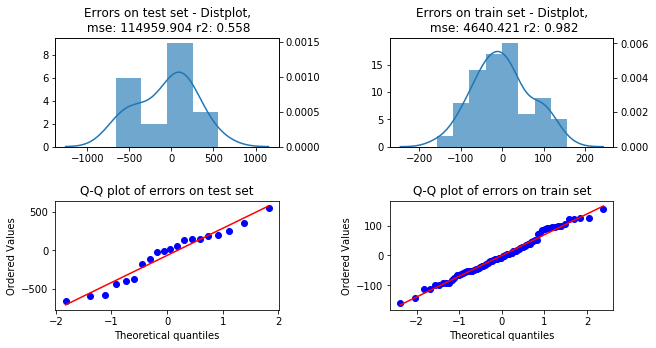

In [19]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

errors_test = (y_pred_test - y_test)
errors_train = (y_pred_train - y_train)


mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test,y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train,y_pred_train)

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.title('Errors on test set - Distplot,\n mse: {} r2: {}'.format(round(mse_test,3),round(r2_test,3)))
ax_test = sns.distplot(errors_test, kde=False)
second_ax1 = ax_test.twinx()
sns.distplot(errors_test, ax=second_ax1, kde=True, hist=True)
plt.subplot(2,2,2)
plt.title('Errors on train set - Distplot,\n mse: {} r2: {}'.format(round(mse_train,3),round(r2_train,3)))
ax_train = sns.distplot(errors_train, kde=False)
second_ax2 = ax_train.twinx()
sns.distplot(errors_train, ax=second_ax2, kde=True)
plt.subplot(2,2,3)
res = stats.probplot(errors_test, plot=plt)
plt.title('Q-Q plot of errors on test set')
plt.subplot(2,2,4)
res = stats.probplot(errors_train, plot=plt)
plt.title('Q-Q plot of errors on train set')
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

In [74]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
class regression_model:
    def __init__(self,X,y,model,parameters):
        self.X = X
        self.y = y
        self.model = model
        self.parameters = parameters
    
    def pre_process_data(self):
        X = StandardScaler().fit_transform(self.X)
        X_train,X_test,y_train,y_test = train_test_split(X,self.y,test_size=0.2)
        return X_train,X_test,y_train,y_test
    
    def fit(self):
        self.X_train,self.X_test,self.y_train,self.y_test = self.pre_process_data()
        gs = GridSearchCV(self.model, self.parameters)
        gs.fit(X_train,y_train)
        model = gs.best_estimator_
        model.fit(X_train,y_train)
        self.best_score = gs.best_score_
        self.best_params = gs.best_params_
        self.model = model
        return

In [75]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
#from regression_model import regression_model

class regression_report(regression_model):
    def __init__(self,model,X,best_score,params):
        super().__init__(model,X,best_score,params)
        super().fit()
        self.y_pred_test = self.model.predict(self.X_test)
        self.y_pred_train = self.model.predict(self.X_train)

        self.errors_test = (self.y_pred_test - self.y_test)
        self.errors_train = (self.y_pred_train - self.y_train)
        
        self.mse_test = mean_squared_error(self.y_test, self.y_pred_test)
        self.r2_test = r2_score(self.y_test,self.y_pred_test)
        self.mse_train = mean_squared_error(self.y_train, self.y_pred_train)
        self.r2_train = r2_score(self.y_train,self.y_pred_train)
        
    def report(self):
        plt.figure(figsize=(10,5))
        plt.subplot(2,2,1)
        plt.title('Errors on test set - Distplot,\n mse: {} r2: {}'.format(round(self.mse_test,3),round(self.r2_test,3)))
        ax_test = sns.distplot(self.errors_test, kde=False)
        second_ax1 = ax_test.twinx()
        sns.distplot(self.errors_test, ax=second_ax1, kde=True, hist=True)
        plt.subplot(2,2,2)
        plt.title('Errors on train set - Distplot,\n mse: {} r2: {}'.format(round(self.mse_train,3),round(self.r2_train,3)))
        ax_train = sns.distplot(errors_train, kde=False)
        second_ax2 = ax_train.twinx()
        sns.distplot(self.errors_train, ax=second_ax2, kde=True)
        plt.subplot(2,2,3)
        res = stats.probplot(self.errors_test, plot=plt)
        plt.title('Q-Q plot of errors on test set')
        plt.subplot(2,2,4)
        res = stats.probplot(errors_train, plot=plt)
        plt.title('Q-Q plot of errors on train set')
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        save_text = 'model {} Best Score {} error report.png'.format(str(self.model),str(self.best_params))
        save_text = save_text.replace(' ','_')
        plt.savefig(save_text)
        plt.show()

In [76]:
rm = regression_model(X,y,Ridge(),parameters)
rm.fit()

/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.32678e-17): result may not be accurate.
  overwrite_a=False)
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/joseph.ganser/anaconda3/lib/pyt

/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.32678e-17): result may not be accurate.
  overwrite_a=False)
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/joseph.ganser/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/joseph.ganser/anaconda3/lib/pyt

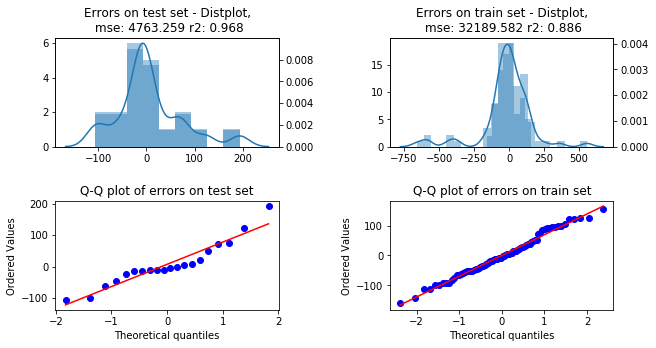

In [78]:
rr = regression_report(X,y,Ridge(),parameters)
rr.report()

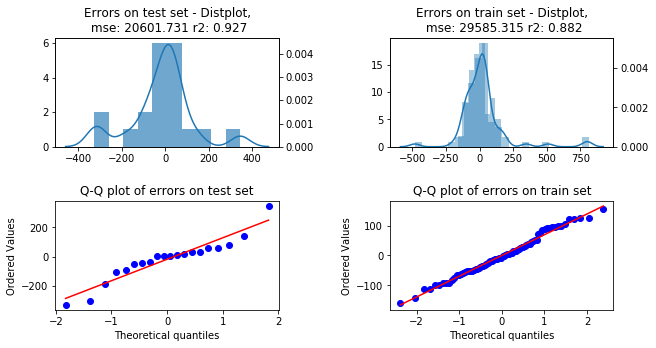

In [73]:
rr.report()